In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2025-06-11 22:17:35.460385: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loading data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28)
Test shape:  (10000, 28, 28)


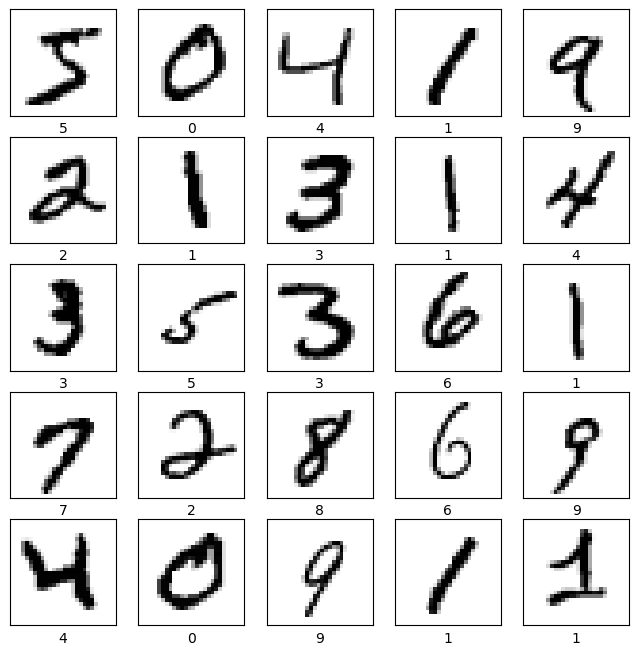

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print('Train shape:', train_images.shape)
print('Test shape: ', test_images.shape)
plt.figure(figsize=[8, 8])
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

# Formating data

In [3]:
def format(images):
    if len(images.shape) == 2:
        return images
    images = images.astype('float32')
    images = images.reshape(*images.shape,1)
    pixel_count = images.shape[1] * images.shape[2]
    images = images.reshape(images.shape[0], pixel_count)
    images = images / 255

    return images

train_images = format(train_images)
test_images = format(test_images)
test_images.shape

(10000, 784)

# One-hot encoding

In [4]:
num_classes = 10
display(test_labels[:5])
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
display(test_labels[:5])

array([7, 2, 1, 0, 4], dtype=uint8)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# Data shuffling

In [5]:

ns = train_images.shape[0]
np.random.seed()
shuffle_index = np.random.permutation(ns)
train_images, train_labels = train_images[shuffle_index, :], train_labels[shuffle_index,]
print(train_images.shape)

(60000, 784)


# Data Split

In [6]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_val:  ', x_val.shape)
print('y_val:  ', y_val.shape)

x_train: (45000, 784)
y_train: (45000, 10)
x_val:   (15000, 784)
y_val:   (15000, 10)


In [7]:
from src.initializers import heNormal
from src.layers import Dense, Input
from src.models import Sequential
from src.optimizers import RMSProp
from src.activations import relu, softmax

In [8]:
model = Sequential(
    [
        Input(784),
        Dense(256, activation=relu, initializer=heNormal),
        Dense(128, activation=relu, initializer=heNormal),
        Dense(10, activation=softmax),
    ]
)

print(f"Parameter count: {model.parameter_count():,}")

history = model.fit(
    x_train,
    y_train,
    validation=(x_val, y_val),
    optimizer=RMSProp(learning_rate=0.00001),
    epochs=100,
    batch_size=128,
    early_stop=("val_accuracy", 0.001, 4),
)

Parameter count: 850,586


Epoch 0/100  - loss: 8.338 - accuracy: 0.07840 - val_loss: 8.318 - val_accuracy: 0.07740
Epoch 1/100  - loss: 1.778 - accuracy: 0.4592 - val_loss: 1.792 - val_accuracy: 0.4574
Epoch 2/100  - loss: 0.8630 - accuracy: 0.7217 - val_loss: 0.8805 - val_accuracy: 0.7166
Epoch 3/100  - loss: 0.5925 - accuracy: 0.8132 - val_loss: 0.6097 - val_accuracy: 0.8088
Epoch 4/100  - loss: 0.4691 - accuracy: 0.8541 - val_loss: 0.4895 - val_accuracy: 0.8468
Epoch 5/100  - loss: 0.3995 - accuracy: 0.8781 - val_loss: 0.4219 - val_accuracy: 0.8696
Epoch 6/100  - loss: 0.3528 - accuracy: 0.8929 - val_loss: 0.3780 - val_accuracy: 0.8837
Epoch 7/100  - loss: 0.3199 - accuracy: 0.9042 - val_loss: 0.3484 - val_accuracy: 0.8929
Epoch 8/100  - loss: 0.2937 - accuracy: 0.9117 - val_loss: 0.3240 - val_accuracy: 0.9025
Epoch 9/100  - loss: 0.2730 - accuracy: 0.9185 - val_loss: 0.3053 - val_accuracy: 0.9087
Epoch 10/100  - loss: 0.2563 - accuracy: 0.9236 - val_loss: 0.2912 - val_accuracy: 0.9129
Epoch 11/100  - loss: 

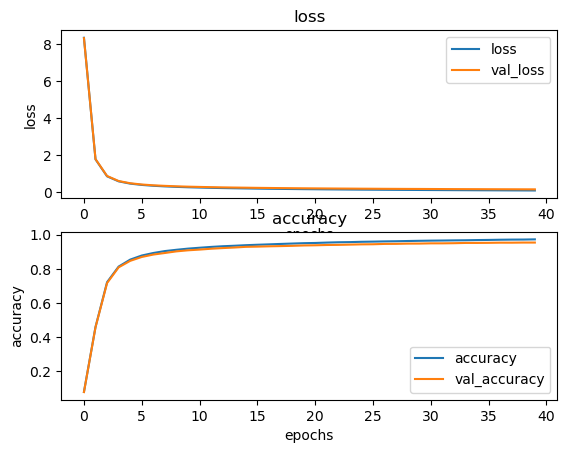

In [9]:
plt.subplot(211)
plt.title("loss")
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.ylabel("loss")
plt.xlabel("epochs")

plt.subplot(212)
plt.title("accuracy")
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.legend(["accuracy", "val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epochs");

# Model Evaluation

In [10]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

Examples count: 10000
Accuracy: 95.68%


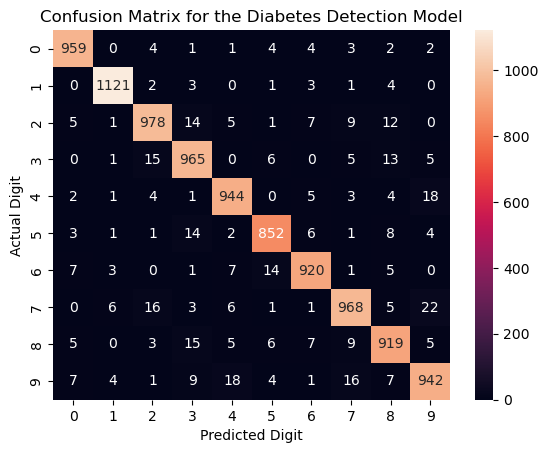

In [11]:
y = test_labels
x = test_images
y_pred = model(x)

y = [np.argmax(q) for q in y]
y_pred = [np.argmax(q) for q in y_pred]

print(f"Examples count: {x.shape[0]}")
print(f"Accuracy: {accuracy_score(y,y_pred):.2%}")

conf = confusion_matrix(y, y_pred)
ax = sns.heatmap(conf, annot=True, fmt='d', )
ax.set_xlabel("Predicted Digit")
ax.set_ylabel("Actual Digit")
ax.set_title("Confusion Matrix for the Diabetes Detection Model");